In this project, we address the challenge faced by a major telecom provider experiencing significant customer churn. Our goal is to understand which customers are most at risk of leaving, develop a predictive model for churn, and identify a prioritized list of high-risk customers for retention efforts.

This notebook is structured as follows:
- Data preprocessing
- Exploratory data analysis
- Prediction model election and evaluation
- Business insights and actionable recommendations


# Data Preprocessing

Data preprocessing is a critical first step in building any predictive model. In this first section, the dataset is carefully cleaned and prepared to ensure model accuracy and reliability. Irrelevant or redundant features are removed to simplify the model. Additionally, variables were transformed or standardized where needed. These steps help reduce noise, improve generalization, and make the model more interpretable and effective.

First of all, the data is loaded and possible rows with lacking values are removed. The DataFrame is displayed to get an idea of the form and type of data.

In [4]:
# The necessary Python packages are loaded.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data is loaded
df = pd.read_csv('./churn_all.csv')

# Rows containing any undetermined values are deleted.
df=df.replace(['?'], np.nan).dropna(axis=0)

# Data is displayed
df

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In view of the data, some attributes that are considered to have no significant predictive value are eliminated and the type of values is standardised in order to process them correctly.

In [5]:
# The 'phone_number' column has no predictive value, so we drop it.
df = df.drop(columns=['phone_number'])

# These are binary 'Yes'/'No' strings; we convert them to 1/0 for modeling.
print(df['international_plan'].unique())
print(df['voice_mail_plan'].unique())

df['international_plan'] = df['international_plan'].map({' yes': 1, ' no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({' yes': 1, ' no': 0})

# One-hot encoding of 'state' and 'area_code'
df = pd.get_dummies(df, columns=['state', 'area_code'], drop_first=True)

# The target 'churn' column is converted to 0/1
df['Churn'] = df['Churn'].astype(int)

# New possibly useful variables are defined
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']

# The new version of the DataFrame is again visualized to check everything is correct and the new dimensions
df

[' no' ' yes']
[' yes' ' no']


,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,total_charge,total_minutes,total_calls
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,True,False,75.56,717.2,303
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,True,False,59.24,625.2,332
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,True,False,62.29,539.4,333
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,66.80,564.8,255
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,True,False,52.09,512.0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,...,False,False,False,False,False,False,False,75.09,766.1,374
4996,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,...,False,False,False,True,False,True,False,66.72,669.3,278
4997,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,...,False,False,False,False,False,True,False,51.82,539.4,318
4998,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,...,False,False,False,False,False,False,True,59.09,593.4,254


Due to one-hot encoding, the DataFrame now has 72 columns. However, robust classification algorithms such as those that will be used later should not take too long or be overly affected by this high number of attributes. If this is the case, however, another strategy will be used.

Otherwise, the data is now correctly standardised and can be analysed. This will be done in the next section.

# Exploratory Data Analysis (EDA)

In this section the aim is to identify patterns and key features that differentiate customers who churn from those who do not. This will inform retention strategies and help prioritize risk profiles.

Initially, a histogram will be generated to examine the distribution of churned customers within the dataset.

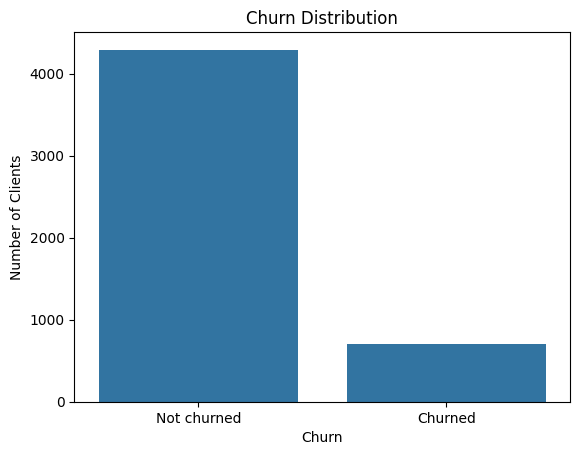

Churners represent 14.14% of the total customer base.


In [6]:
# A simple histogram is plotted to gain an initial understanding of the distribution of churned customers in the dataset.
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Clients")

# Añadir leyenda personalizada para aclarar valores de la variable 'Churn'
plt.xticks([0, 1], ["Not churned", "Churned"])

plt.show()

# The rate is also calculated quantitatively.
churn_rate = df['Churn'].mean() * 100
print(f"Churners represent {churn_rate:.2f}% of the total customer base.")

The histogram shows that only a small portion, about 14%, of customers have churned. This imbalance means that our model needs to carefully handle the minority group of churners to accurately predict who might leave, ensuring we don't overlook these valuable cases.

To gain deeper insight into the relationship between customer service interactions and churn behavior, two complementary visualizations are presented. The countplot illustrates how the number of customer service calls varies between customers who churned and those who did not, highlighting potential patterns in call frequency. The boxplot further compares the distribution of service calls across the churn groups, providing a clear view of central tendency and variability. Together, these plots help identify whether frequent customer service interactions might be an indicator or predictor of churn, which can guide targeted retention strategies. Additionally, descriptive statistics are calculated to quantify these differences and support data-driven conclusions.

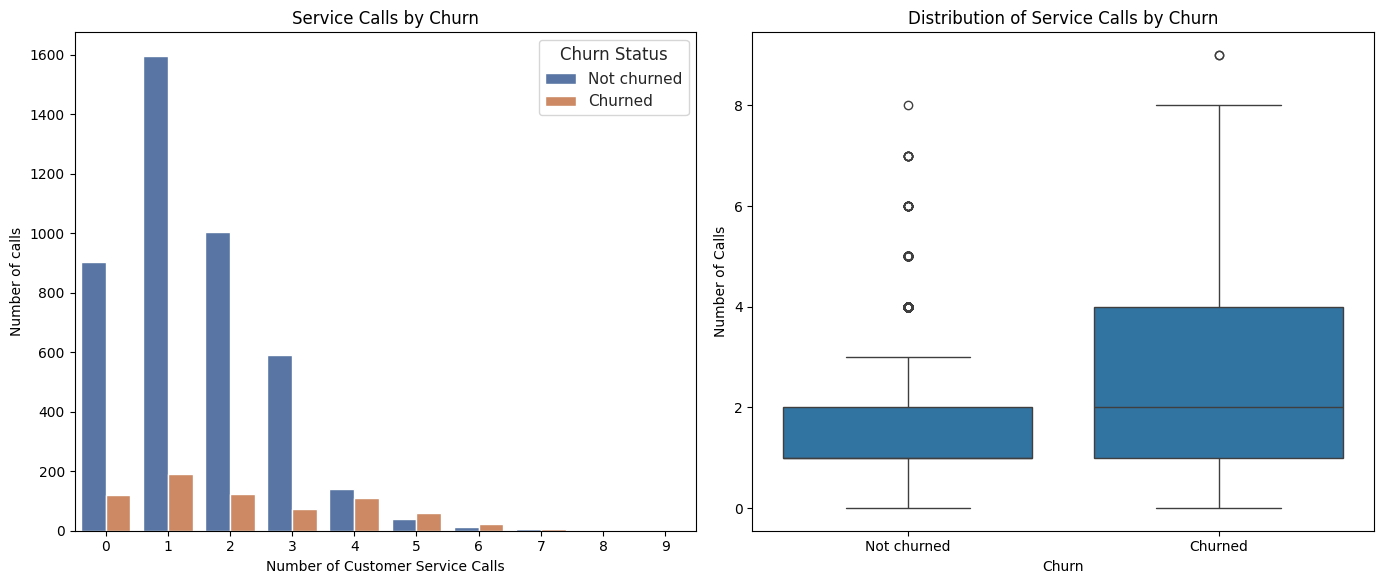

Descriptive statistics for number_customer_service_calls by churn status:

       count      mean  median       std  mode
Churn                                         
0       4293  1.457722     1.0  1.164236     1
1        707  2.254597     2.0  1.815956     1


In [7]:
# A package for statistics is loaded
from scipy import stats

# The frame and style of the two graphis below is set
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(style="whitegrid")

# Countplot of number of calls per churn
sns.countplot(x='number_customer_service_calls', hue='Churn', data=df, ax=axes[0])
axes[0].set_title("Service Calls by Churn")
axes[0].set_xlabel("Number of Customer Service Calls")
axes[0].set_ylabel("Number of calls")
axes[0].legend(title="Churn Status", labels=["Not churned", "Churned"])

# Boxplot comparing statistical distribution
sns.boxplot(x='Churn', y='number_customer_service_calls', data=df, ax=axes[1])
axes[1].set_title("Distribution of Service Calls by Churn")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Number of Calls")
plt.xticks([0, 1], ["Not churned", "Churned"])

# Both graphics are displayed
plt.tight_layout()
plt.show()

# Quantitative descriptive statistics by group
grouped_stats = df.groupby('Churn')['number_customer_service_calls'].agg(
    ['count', 'mean', 'median', 'std', pd.Series.mode]
)

print("Descriptive statistics for number_customer_service_calls by churn status:\n")
print(grouped_stats)



The statistics reveal a Interestingly, the most common number of calls (mode) is 1 for both groups, indicating that a single customer service interaction is the most frequent behavior across the board. However, churned customers tend to contact support more often overall, as reflected in their higher mean and greater variability. This suggests that while occasional contact is typical, repeated service calls may be a signal of unresolved issues or customer dissatisfaction that could lead to churn.difference in customer service call behavior between churned and non-churned customers. On average, churned customers contacted customer service approximately 2.25 times, compared to just 1.46 times for those who did not churn. The median values (2.0 vs. 1.0) and higher standard deviation for churned users (1.82 vs. 1.16) further support this distinction, indicating both a greater frequency and variability in interactions among churned customers. Interestingly, the most common number of calls (mode) is 1 for both groups, suggesting that while many customers reach out only once, those who churn are more likely to have repeated issues, potentially signaling dissatisfaction or unresolved problems. These insights highlight the predictive value of service call volume as a churn indicator.

A similar analysis is conducted to explore the relationship between having an international plan and the likelihood of customer churn. By comparing the distribution of churn status among customers with and without an international plan, the goal is to assess whether this service offering is associated with higher churn rates. Understanding this relationship may help identify specific customer segments that are more at risk and inform targeted retention strategies.

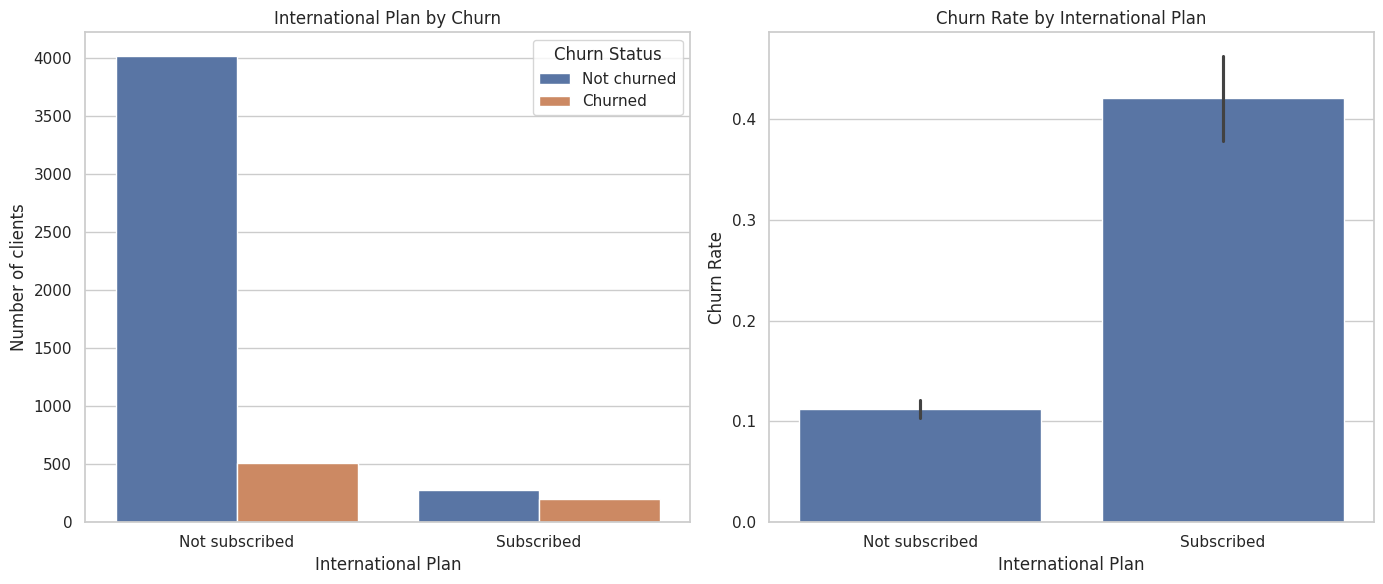

Churn rate by international plan:

                    count   mean  median    std  mode
international_plan                                   
0                    4527  0.112     0.0  0.316     0
1                     473  0.421     0.0  0.494     0


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(style="whitegrid")

# Countplot: How many customers have or do not have the international plan?
sns.countplot(x='international_plan', hue='Churn', data=df, ax=axes[0])
axes[0].set_title("International Plan by Churn")
axes[0].set_xlabel("International Plan")
axes[0].set_ylabel("Number of clients")
axes[0].legend(title="Churn Status", labels=["Not churned", "Churned"])
axes[0].set_xticks([0, 1], ["Not subscribed", "Subscribed"])

# Bar plot: what is the churn rate in each group?
sns.barplot(x='international_plan', y='Churn', data=df, ax=axes[1])
axes[1].set_title("Churn Rate by International Plan")
axes[1].set_xlabel("International Plan")
axes[1].set_ylabel("Churn Rate")
axes[1].set_xticks([0, 1], ["Not subscribed", "Subscribed"])

plt.tight_layout()
plt.show()

# Descriptive statistics of churn by international plan group
stats_plan = df.groupby('international_plan')['Churn'].agg(
    ['count', 'mean', 'median', 'std', pd.Series.mode]).round(3)

print("Churn rate by international plan:\n")
print(stats_plan)

The churn rate among customers with an international plan is significantly higher compared to those without one. Specifically, 42.1% of customers who are subscribed to the international plan have churned, versus only 11.2% of those who are not subscribed. While the most common outcome (mode) is no churn in both groups, the substantially higher mean churn rate and standard deviation for international plan subscribers suggest a strong association between having this plan and customer attrition. This may indicate dissatisfaction with the international service offering or pricing, making it a potential area for improvement or customer support focus.

A similar analysis is performed to examine the relationship between the voice mail plan and customer churn. By comparing churn rates between customers who are subscribed to the voice mail service and those who are not, the objective is to determine whether this feature plays a role in customer retention or dissatisfaction. This analysis can help identify whether the voice mail plan is contributing to customer loyalty or if adjustments to the service are needed.

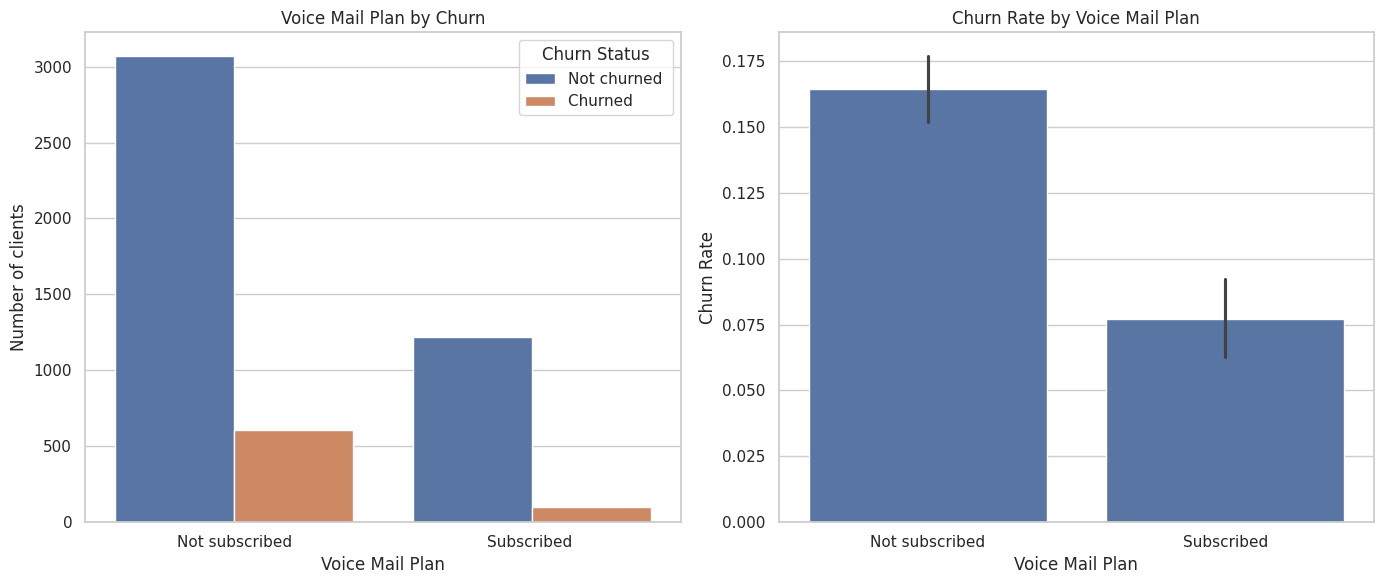

Churn rate by voice mail plan:

                 count   mean  median    std  mode
voice_mail_plan                                   
0                 3677  0.165     0.0  0.371     0
1                 1323  0.077     0.0  0.267     0


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(style="whitegrid")

# Countplot: How many customers have or do not have the voice mail plan?
sns.countplot(x='voice_mail_plan', hue='Churn', data=df, ax=axes[0])
axes[0].set_title("Voice Mail Plan by Churn")
axes[0].set_xlabel("Voice Mail Plan")
axes[0].set_ylabel("Number of clients")
axes[0].legend(title="Churn Status", labels=["Not churned ", "Churned "])
axes[0].set_xticks([0, 1], ["Not subscribed", "Subscribed "])

# Bar plot: what is the churn rate in each group?
sns.barplot(x='voice_mail_plan', y='Churn', data=df, ax=axes[1])
axes[1].set_title("Churn Rate by Voice Mail Plan")
axes[1].set_xlabel("Voice Mail Plan")
axes[1].set_ylabel("Churn Rate")
axes[1].set_xticks([0, 1], ["Not subscribed", "Subscribed"])

plt.tight_layout()
plt.show()

# Descriptive statistics of churn by international plan group
stats_plan = df.groupby('voice_mail_plan')['Churn'].agg(
    ['count', 'mean', 'median', 'std', pd.Series.mode]).round(3)

print("Churn rate by voice mail plan:\n")
print(stats_plan)

The analysis reveals that customers without a voice mail plan have a notably higher churn rate (16.5%) compared to those who are subscribed to the plan (7.7%). Although the median churn remains 0 in both groups, the difference in mean churn rates suggests that having a voice mail plan may be associated with increased customer retention. This could indicate that customers who use this feature perceive additional value or engagement, which contributes to greater satisfaction and loyalty.

The next step involves analyzing customer churn in relation to their call-related charges across different time periods—morning, evening, night—as well as international usage. Additionally, a combined variable representing total charges is examined to assess overall spending patterns. This analysis aims to determine whether higher or lower usage in specific time slots or services is associated with a greater likelihood of churn. Understanding these relationships can help identify high-risk customer profiles based on their consumption behavior and inform more targeted retention strategies.

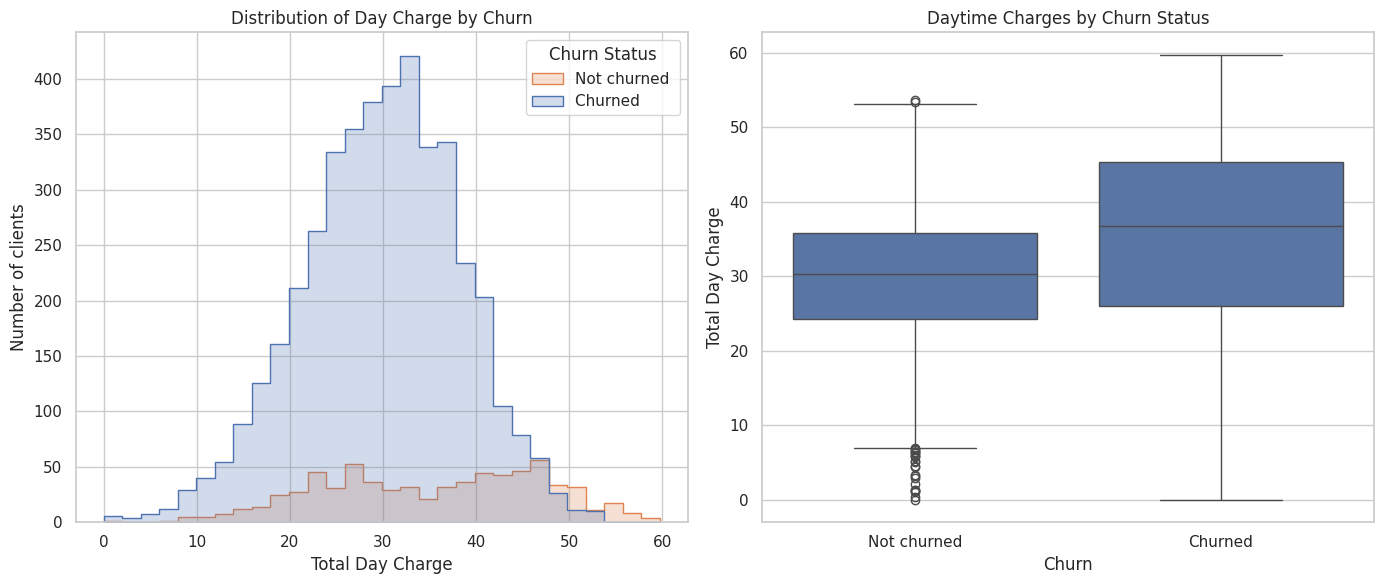

Day charge statistics by churn status:

       count   mean  median    std  min    max
Churn                                         
0       4293  29.88   30.26   8.44  0.0  53.65
1        707  35.34   36.70  11.66  0.0  59.76


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot: only to show class balance
sns.histplot(data=df, x='total_day_charge', hue='Churn', bins=30, kde=False, ax=axes[0], element='step', stat='count')
axes[0].set_title("Distribution of Day Charge by Churn")
axes[0].set_xlabel("Total Day Charge")
axes[0].set_ylabel("Number of clients")
axes[0].legend(title="Churn Status", labels=["Not churned ", "Churned "])

# Boxplot: how total_day_charge varies by churn
sns.boxplot(x='Churn', y='total_day_charge', data=df, ax=axes[1])
axes[1].set_title("Daytime Charges by Churn Status")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Total Day Charge")
plt.xticks([0, 1], ["Not churned", "Churned"])

plt.tight_layout()
plt.show()

# Descriptive statistics
day_charge_stats = df.groupby('Churn')['total_day_charge'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).round(2)

print("Day charge statistics by churn status:\n")
print(day_charge_stats)


The analysis of daytime call charges by churn status reveals that customers who churn tend to incur significantly higher charges during the day. Specifically, churned customers have an average day charge of 35.34 compared to 29.88 for non-churned customers. This difference is also reflected in the median values (36.70 vs. 30.26), suggesting a consistent trend across the distribution. The standard deviation is notably higher among churned customers, indicating greater variability in their daytime usage. These findings suggest that higher daytime activity may be linked to increased churn risk, potentially due to dissatisfaction with cost or service during peak hours.

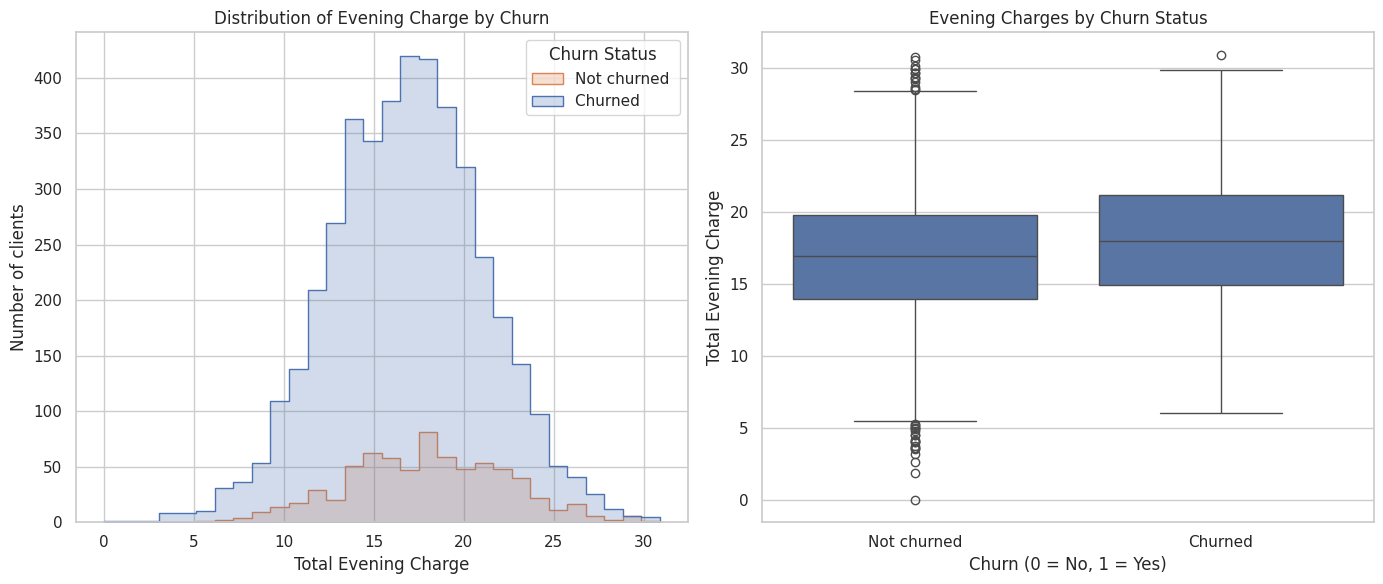

Evening charge statistics by churn status:

       count  mean  median   std   min    max
Churn                                        
0       4293  16.9   16.96  4.26  0.00  30.75
1        707  18.0   17.94  4.38  6.03  30.91


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot: only to show class balance
sns.histplot(data=df, x='total_eve_charge', hue='Churn', bins=30, kde=False, ax=axes[0], element='step', stat='count')
axes[0].set_title("Distribution of Evening Charge by Churn")
axes[0].set_xlabel("Total Evening Charge")
axes[0].set_ylabel("Number of clients")
axes[0].legend(title="Churn Status", labels=["Not churned ", "Churned "])

# Boxplot: how total_eve_charge varies by churn
sns.boxplot(x='Churn', y='total_eve_charge', data=df, ax=axes[1])
axes[1].set_title("Evening Charges by Churn Status")
axes[1].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[1].set_ylabel("Total Evening Charge")
plt.xticks([0, 1], ["Not churned", "Churned"])

plt.tight_layout()
plt.show()

# Descriptive statistics
eve_charge_stats = df.groupby('Churn')['total_eve_charge'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).round(2)

print("Evening charge statistics by churn status:\n")
print(eve_charge_stats)

The analysis of evening call charges by churn status shows that customers who churn tend to have slightly higher evening charges compared to those who do not. The mean evening charge for churned customers is 18.00, while for non-churned customers it is 16.90. Median values are similar, at 17.94 and 16.96 respectively, indicating a consistent pattern. The standard deviations are comparable between the two groups, suggesting similar variability in evening usage. These results imply a modest association between higher evening call charges and churn, though less pronounced than daytime charges.

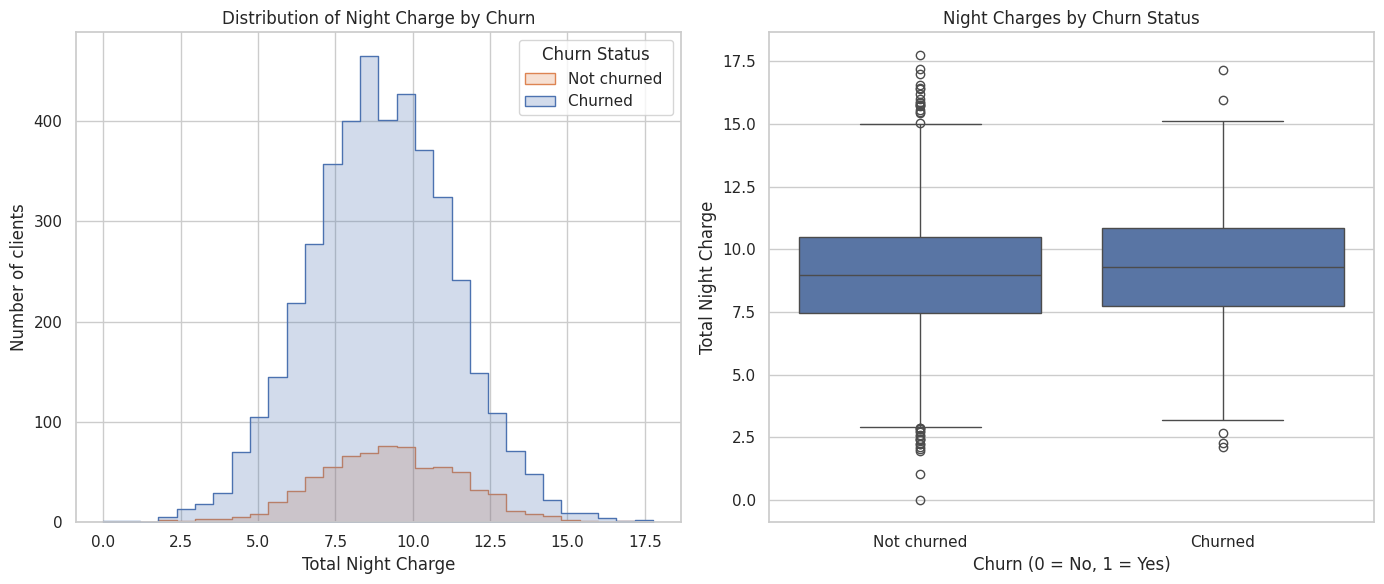

Night charge statistics by churn status:

       count  mean  median   std   min    max
Churn                                        
0       4293  8.98    8.96  2.28  0.00  17.77
1        707  9.27    9.28  2.24  2.13  17.17


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot: only to show class balance
sns.histplot(data=df, x='total_night_charge', hue='Churn', bins=30, kde=False, ax=axes[0], element='step', stat='count')
axes[0].set_title("Distribution of Night Charge by Churn")
axes[0].set_xlabel("Total Night Charge")
axes[0].set_ylabel("Number of clients")
axes[0].legend(title="Churn Status", labels=["Not churned ", "Churned "])

# Boxplot: how total_night_charge varies by churn
sns.boxplot(x='Churn', y='total_night_charge', data=df, ax=axes[1])
axes[1].set_title("Night Charges by Churn Status")
axes[1].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[1].set_ylabel("Total Night Charge")
plt.xticks([0, 1], ["Not churned", "Churned"])

plt.tight_layout()
plt.show()

# Descriptive statistics
night_charge_stats = df.groupby('Churn')['total_night_charge'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).round(2)

print("Night charge statistics by churn status:\n")
print(night_charge_stats)

The analysis of night call charges by churn status indicates a marginal difference between churned and non-churned customers. Those who churn have a slightly higher average night charge of 9.27 compared to 8.98 for non-churned customers. Median values are nearly identical (around 9.28 vs. 8.96), and the standard deviations are similar, indicating comparable variability in usage. This suggests that night-time call charges have minimal impact on churn likelihood.

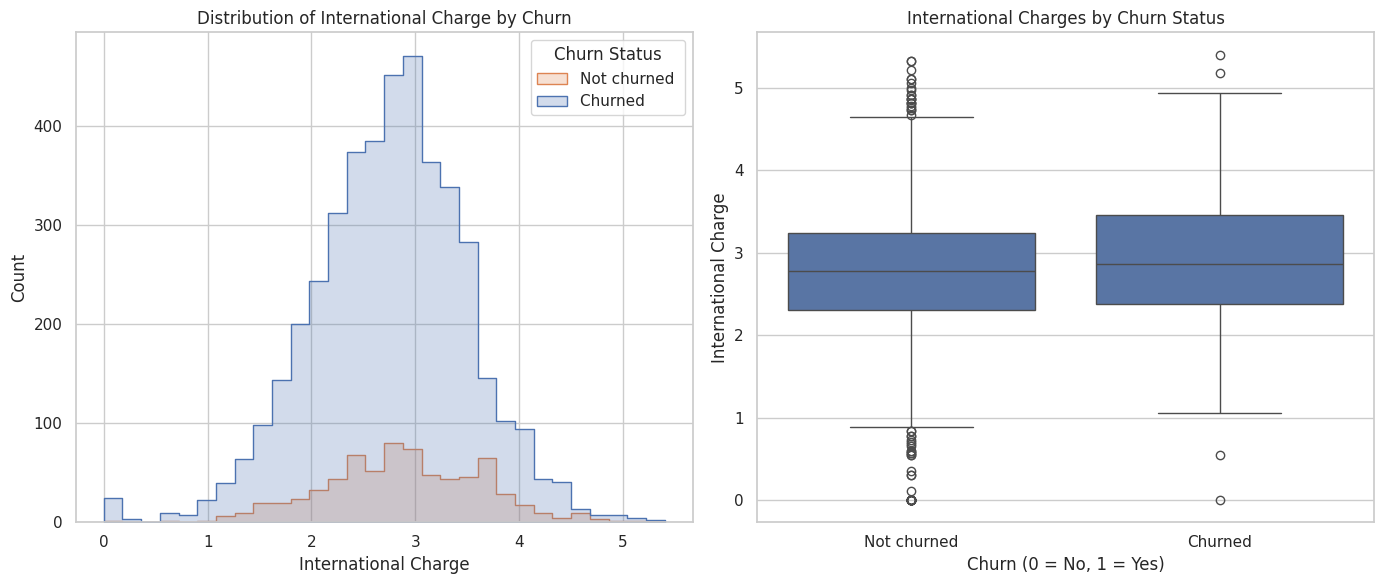

International charge statistics by churn status:

       count  mean  median   std  min   max
Churn                                      
0       4293  2.75    2.78  0.74  0.0  5.32
1        707  2.89    2.86  0.75  0.0  5.40


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot: only to show class balance
sns.histplot(data=df, x='total_intl_charge', hue='Churn', bins=30, kde=False, ax=axes[0], element='step', stat='count')
axes[0].set_title("Distribution of International Charge by Churn")
axes[0].set_xlabel("International Charge")
axes[0].set_ylabel("Count")
axes[0].legend(title="Churn Status", labels=["Not churned ", "Churned "])

# Boxplot: how total_intl_charge varies by churn
sns.boxplot(x='Churn', y='total_intl_charge', data=df, ax=axes[1])
axes[1].set_title("International Charges by Churn Status")
axes[1].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[1].set_ylabel("International Charge")
plt.xticks([0, 1], ["Not churned", "Churned"])

plt.tight_layout()
plt.show()

# Descriptive statistics
int_charge_stats = df.groupby('Churn')['total_intl_charge'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).round(2)

print("International charge statistics by churn status:\n")
print(int_charge_stats)



The analysis of international call charges by churn status reveals a slight increase in average spending among churned customers. Those who churn have a mean international charge of 2.89, compared to 2.75 for non-churned customers. Median values are also marginally higher for churners ( 2.86 vs. 2.78 ). The standard deviations are almost identical across groups, indicating similar variability in international usage. While the difference is small, it may suggest that customers with slightly higher international usage have a marginally elevated risk of churn.

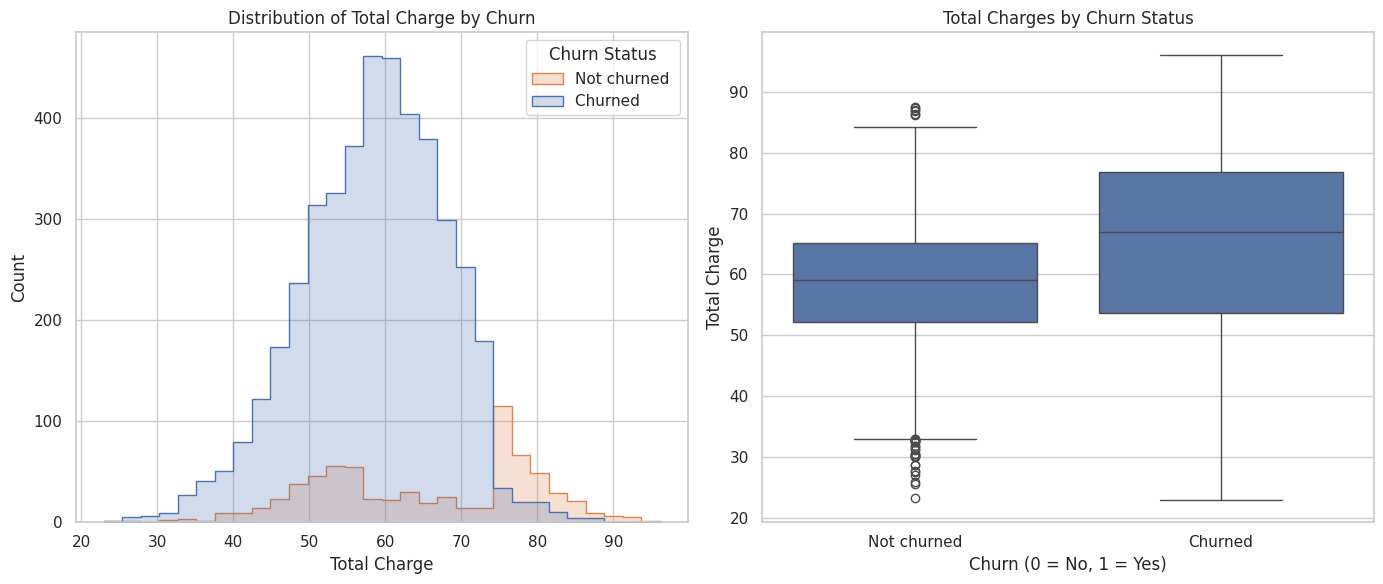

Total charge statistics by churn status:

       count  mean  median    std    min    max
Churn                                          
0       4293  58.5   59.09   9.31  23.25  87.48
1        707  65.5   66.94  13.76  22.93  96.15


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot: only to show class balance
sns.histplot(data=df, x='total_charge', hue='Churn', bins=30, kde=False, ax=axes[0], element='step', stat='count')
axes[0].set_title("Distribution of Total Charge by Churn")
axes[0].set_xlabel("Total Charge")
axes[0].set_ylabel("Count")
axes[0].legend(title="Churn Status", labels=["Not churned ", "Churned "])

# Boxplot: how total_charge varies by churn
sns.boxplot(x='Churn', y='total_charge', data=df, ax=axes[1])
axes[1].set_title("Total Charges by Churn Status")
axes[1].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[1].set_ylabel("Total Charge")
plt.xticks([0, 1], ["Not churned", "Churned"])

plt.tight_layout()
plt.show()

# Descriptive statistics
total_charge_stats = df.groupby('Churn')['total_charge'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).round(2)

print("Total charge statistics by churn status:\n")
print(total_charge_stats)

The total charge statistics by churn status demonstrate that customers who churn tend to have higher overall charges. The mean total charge for churned customers is 65.50, notably above the 58.50 mean for those who do not churn. Median values follow the same pattern, with 66.94 for churners versus 59.09 for non-churners. Additionally, churned customers show greater variability in total charges, as indicated by a higher standard deviation (13.76 compared to 9.31). These findings suggest a clear correlation between higher total spending and an increased likelihood of churn.

Overall, the analysis reveals a consistent relationship between higher customer spending and increased likelihood of churn. Across all time periods—daytime, evening, and night—churned customers tend to incur higher call-related charges, with the strongest differences observed during daytime hours. This pattern may indicate that customers who use services more heavily during peak times are more sensitive to pricing or service quality issues, leading to higher churn. While international usage shows only a slight increase among churners, it still contributes to the overall trend of higher total spending being associated with churn. The combined total charge variable reinforces this conclusion, showing that customers with higher overall charges are significantly more likely to leave. These insights suggest that heavy users may require more proactive engagement or tailored retention strategies. Understanding these behavioral patterns allows for more effective segmentation and intervention, helping the business target high-risk customers before they churn.

To further understand potential geographical influences on customer churn, an analysis was conducted based on the customer's state and area code. Geographic segmentation can reveal regional patterns in customer behavior that may be tied to demographic, economic, or service-related factors. By examining churn rates across different states and area codes, the goal is to determine whether location plays a significant role in predicting customer attrition. This insight can support more localized marketing or service strategies aimed at improving customer retention in high-risk areas.

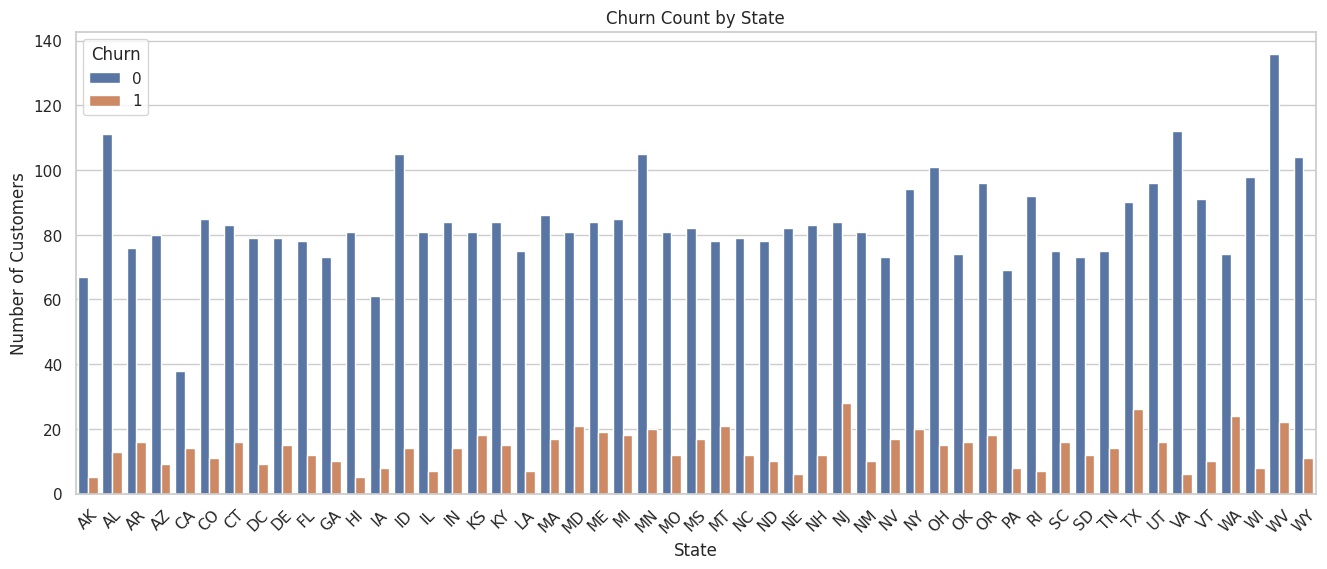

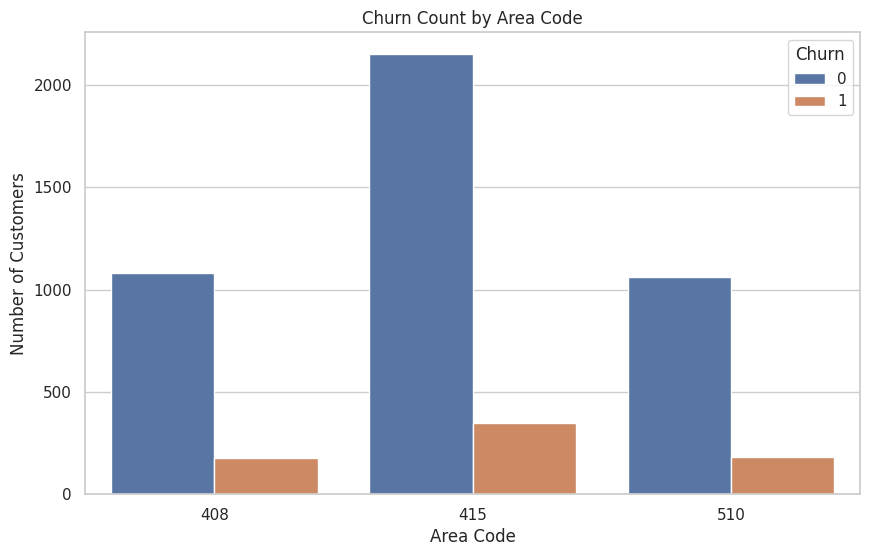

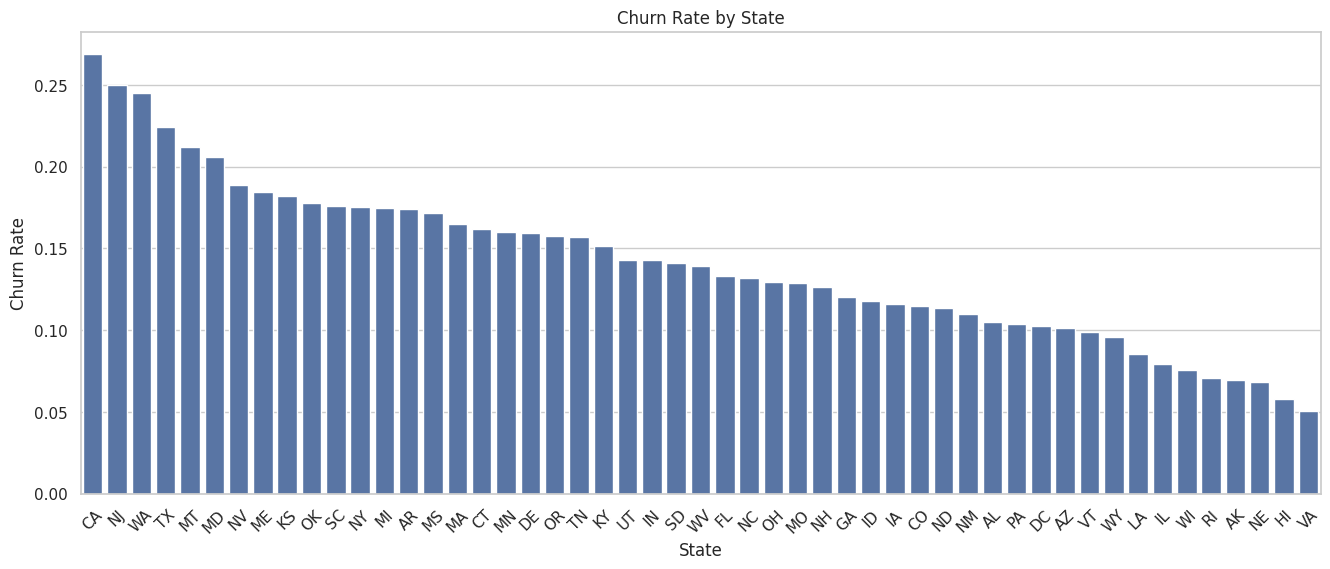

In [15]:
# Load original data again for geographical churn analysis
df_geo = pd.read_csv('./churn_all.csv')
df_geo = df_geo.replace(['?'], np.nan).dropna(axis=0)
df_geo['international_plan'] = df_geo['international_plan'].map({' yes': 1, ' no': 0})
df_geo['voice_mail_plan'] = df_geo['voice_mail_plan'].map({' yes': 1, ' no': 0})
df_geo['Churn'] = df_geo['Churn'].astype(int)

# Churn count per state and area_code
plt.figure(figsize=(16, 6))
sns.countplot(x='state', hue='Churn', data=df_geo, order=sorted(df_geo['state'].unique()))
plt.title("Churn Count by State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='area_code', hue='Churn', data=df_geo, order=sorted(df_geo['area_code'].unique()))
plt.title("Churn Count by Area Code")
plt.xlabel("Area Code")
plt.ylabel("Number of Customers")
plt.show()

# Churn rate per state
state_churn_rate = df_geo.groupby('state')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(x=state_churn_rate.index, y=state_churn_rate.values)
plt.title("Churn Rate by State")
plt.xlabel("State")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


The observed variation in churn rates across different states, ranging from 5% in Virginia to 27% in California, suggests that customer location may influence churn behavior. Interestingly, the states with the highest churn rates—California, New Jersey, Washington, Texas, and Montana—are among the most populous or urbanized in the U.S. This could be associated with greater competition among service providers, higher customer expectations, and increased population mobility, all of which may contribute to higher churn. In contrast, states with the lowest churn rates—Virginia, Hawaii, Nebraska, Alaska, and Rhode Island—tend to have smaller populations or more rural profiles, possibly indicating fewer provider alternatives and higher customer loyalty. Although area code distribution shows that area code 415 has the most customers, the churn rate remains relatively consistent across all area codes. These findings suggest that geographic and demographic factors, such as state population and urbanization, may play a role in customer retention dynamics.

To conclude the exploratory analysis, a correlation matrix is computed to examine the relationships between all numerical features and the churn variable. Due to the large number of new variables introduced through one-hot encoding, particularly for the state attribute, only the top 10 features most strongly correlated with churn are visualized. The objective of this final analysis is threefold: to confirm insights previously identified in earlier sections, to uncover additional features that may be relevant predictors of churn, and to detect highly correlated feature pairs that could lead to redundancy. Identifying such multicollinearity is essential for optimizing the predictive model developed in the next section, as it allows for the removal of variables that contribute overlapping information.

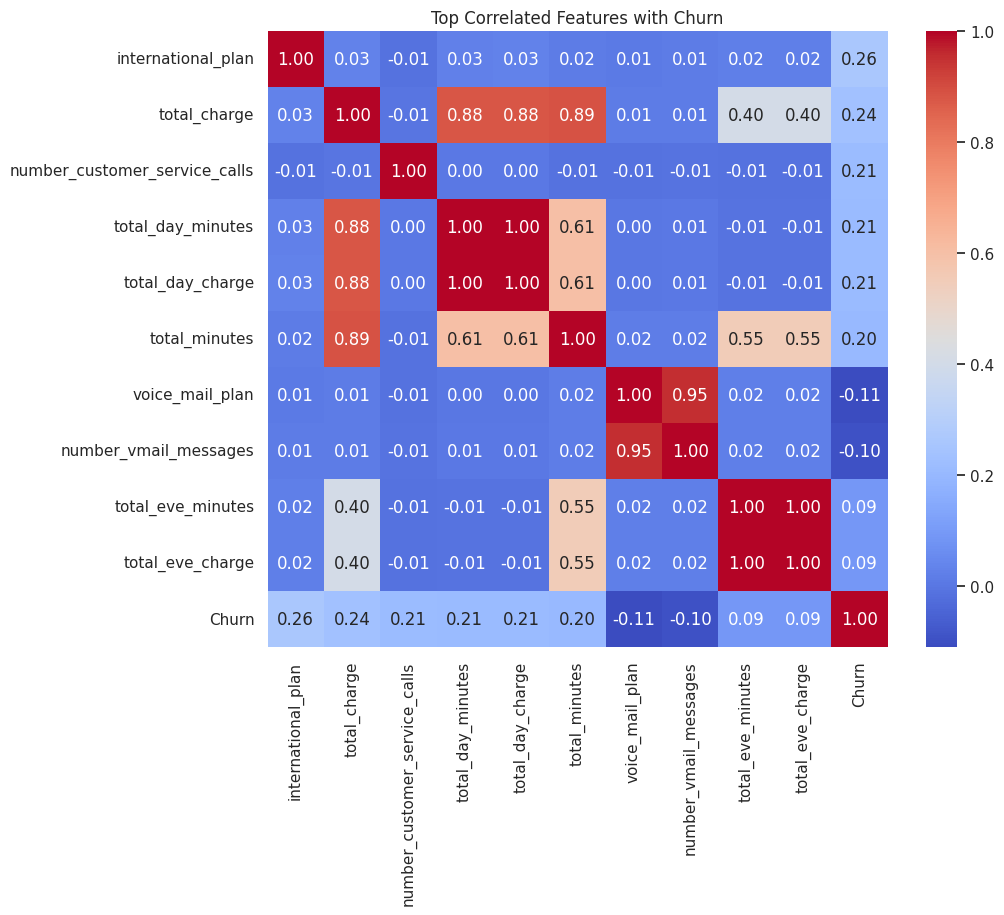

Highly correlated variables to consider dropping: ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'total_calls']


In [16]:
# Complete correlation matrix (numerical atributes only)
corr_matrix = df.corr(numeric_only=True)

# We sort the correlations with churn (in absolute value, not including churn=1)
churn_corr = corr_matrix['Churn'].drop('Churn').abs().sort_values(ascending=False)

# We selected the 10 variables most correlated with churn.
top_features = churn_corr.head(10).index.tolist() + ['Churn']

# We create a heatmap only for those
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with Churn")
plt.show()

# Complete correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

# We'll stick with the top of the triangle (so as not to repeat ourselves).
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with a correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated variables to consider dropping:", to_drop)


The correlation analysis confirms several of the earlier findings and provides additional insights for refining the predictive model. Among the attributes most strongly associated with customer churn are having an international calling plan, total daily spending, the frequency of calls to customer service, and daytime call duration. These factors appear to be key indicators of customer dissatisfaction or behavior patterns linked to churn. Additionally, the analysis reveals several pairs of features that are highly correlated with each other, such as various charge categories and the total number of calls. Since these variables provide overlapping information, they may be excluded from the modeling phase to avoid redundancy and improve the model's efficiency and interpretability.

# Prediction model election and evaluation


First, we prepare the data, removing some attributes that may be redundant for the predictive model because they are strongly correlated with others. In this case, it is considered that more information about customer value can be provided by daily expenditure attributes, so those related to minutes and calls, which are highly correlated, are removed.

In [17]:
# Import the necessary packages for the prediction modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# We remove redundant atributes concluding from the correlation matrix
df = df.drop(columns=[ "total_day_minutes", "total_day_calls",
                      "total_eve_minutes", "total_eve_calls", "total_night_minutes", "total_night_calls",
                      "total_intl_minutes", "total_intl_calls", 'number_vmail_messages'])

df

,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,Churn,state_AL,state_AR,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,total_charge,total_minutes,total_calls
0,0,1,45.07,16.78,11.01,2.70,1,0,False,False,...,False,False,False,False,False,True,False,75.56,717.2,303
1,0,1,27.47,16.62,11.45,3.70,1,0,False,False,...,False,False,False,False,False,True,False,59.24,625.2,332
2,0,0,41.38,10.30,7.32,3.29,0,0,False,False,...,False,False,False,False,False,True,False,62.29,539.4,333
3,1,0,50.90,5.26,8.86,1.78,2,0,False,False,...,False,False,False,False,False,False,False,66.80,564.8,255
4,1,0,28.34,12.61,8.41,2.73,3,0,False,False,...,False,False,False,False,False,True,False,52.09,512.0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,40.07,18.96,13.39,2.67,2,0,False,False,...,False,False,False,False,False,False,False,75.09,766.1,374
4996,0,0,31.31,21.83,9.61,3.97,3,1,False,False,...,False,False,False,True,False,True,False,66.72,669.3,278
4997,0,0,23.90,14.69,9.56,3.67,1,0,False,False,...,False,False,False,False,False,True,False,51.82,539.4,318
4998,0,0,32.10,14.59,10.10,2.30,0,0,False,False,...,False,False,False,False,False,False,True,59.09,593.4,254


Both the training and test sets are standardized using feature scaling to ensure that all variables contribute equally to the model and to improve the performance of algorithms sensitive to feature magnitude. Now, the training and testing sets are prepared, with the test set representing 30% of the data—a proportion that is commonly used and provides a good balance between training accuracy and reliable evaluation of the model's generalization capability.

Then both sets are standardized using feature scaling to ensure that all variables contribute equally to the model and to improve convergence and performance of algorithms sensitive to feature magnitude.

In [18]:
# The train and test subsets are prepared.
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Both sets are scaled to ensure that all variables contribute equally to the model and to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



To evaluate the predictive performance of different modeling approaches, three classification algorithms are trained and tested: Logistic Regression, Random Forest, and XGBoost. These models were selected based on their complementary strengths. Logistic Regression serves as a strong baseline and is valued for its interpretability, especially in scenarios where understanding the drivers of churn is important. Random Forest, a robust ensemble method, is known for handling non-linear relationships and interactions effectively without extensive preprocessing. XGBoost, a powerful gradient boosting algorithm, is included due to its superior performance in many classification tasks, particularly when dealing with imbalanced datasets, as it allows for custom weighting of the minority class. Each model is evaluated using precision, recall, F1-score (focused on the churn class), and the AUC score, which collectively offer a comprehensive view of their classification capabilities. A professional comparison table is generated to visually compare their performance and inform the model selection process.

In [28]:
from sklearn.metrics import accuracy_score
# Training and testing with Logistic Regression

logreg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
y_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]

# Training and testing with Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Training and testing with XGB
scale = (len(y_train) - sum(y_train)) / sum(y_train)  # ajustar desequilibrio
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    scale_pos_weight=scale, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]




# Evaluation of the three models with the common metrics

def get_metrics(y_test, y_pred, y_prob, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    return {
        "Model": model_name,
        "Precision (Churn)": report["1"]["precision"],
        "Recall (Churn)": report["1"]["recall"],
        "F1-Score (Churn)": report["1"]["f1-score"],
        "AUC": auc,
        "Accuracy": accuracy
    }

results = []
results.append(get_metrics(y_test, y_pred_log, y_prob_log, "Logistic Regression"))
results.append(get_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest"))
results.append(get_metrics(y_test, y_pred_xgb, y_prob_xgb, "XGBoost"))

# Display the comparison table
results_df = pd.DataFrame(results)
styled_table = results_df.style.format(precision=3).bar(
    subset=["Precision (Churn)", "Recall (Churn)", "F1-Score (Churn)", "AUC", "Accuracy"],
).set_caption("📊 Performance Comparison Between Models")
styled_table

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Precision (Churn),Recall (Churn),F1-Score (Churn),AUC,Accuracy
0,Logistic Regression,0.359,0.745,0.485,0.828,0.776
1,Random Forest,1.000,0.698,0.822,0.921,0.957
2,XGBoost,0.932,0.778,0.848,0.920,0.961


In addition to these metrics, the ROC curves for all three models are plotted to visualize their ability to distinguish between classes at various classification thresholds. The ROC curve (Receiver Operating Characteristic) illustrates the trade-off between the true positive rate and the false positive rate, and the Area Under the Curve (AUC) summarizes this performance into a single value. A higher AUC indicates a model that better separates churners from non-churners regardless of the chosen threshold.

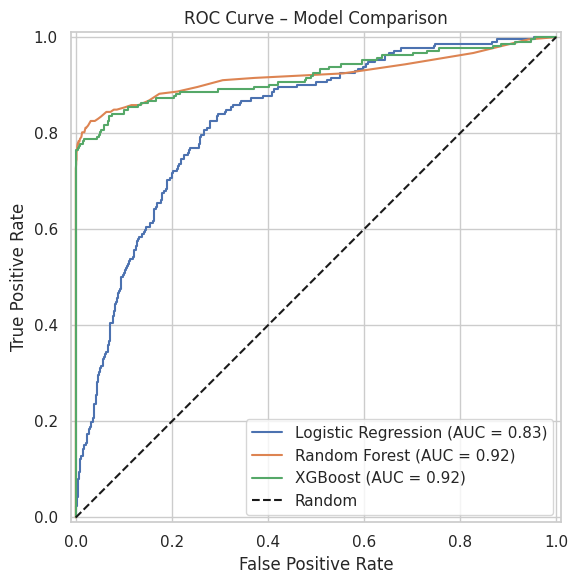

In [29]:
# Draw the ROC curves of the different models on the same axes.

from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))
ax = plt.gca()


RocCurveDisplay.from_predictions(y_test, y_prob_log, name="Logistic Regression", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_prob_rf, name="Random Forest", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost", ax=ax)

# Random line
plt.plot([0, 1], [0, 1], "k--", label="Random")

plt.title("ROC Curve – Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Based on the updated evaluation metrics, XGBoost demonstrates the most balanced and robust performance among the three models. It achieves the highest F1-score (0.848), a strong AUC (0.920), and a solid accuracy of 0.961, indicating an excellent ability to distinguish between churners and non-churners while maintaining a good balance between precision (0.932) and recall (0.778).

Random Forest also performs well, with a slightly lower F1-score (0.822) and a nearly identical AUC (0.921). It achieves perfect precision (1.000), meaning that every churner it predicts is indeed one, but this comes at the cost of lower recall (0.698), suggesting it misses a larger number of actual churners. Its accuracy is also high, at 0.957.

Logistic Regression, while the most interpretable model, shows comparatively weaker performance. It achieves a lower F1-score (0.485) and accuracy (0.875), despite a reasonable recall (0.745). Its precision (0.359) is notably low, indicating a tendency to overpredict churn, which leads to a higher rate of false positives.

Overall, XGBoost offers the best trade-off between sensitivity and precision, with high overall accuracy and discrimination power. As such, it is considered the most suitable model for deployment in this churn prediction context and will be selected for use in the subsequent prediction phase.

Next, we will calculate the churn probability of each customer in the DataFrame using the XGBoost model and select the 500 with the highest predicted churn probability.

In [41]:
# The dataset is rescaled.
X_all_scaled = scaler.transform(X)  # X es el DataFrame con todas las variables predictoras (sin la variable objetivo)

# We predict the probability of churn for all customers.
y_all_prob = xgb.predict_proba(X_all_scaled)[:, 1]

# We add the probability to the original DataFrame.
df["churn_probability"] = y_all_prob

# We sorted by highest probability and selected the top 500.
top_500_churn_risk = df.sort_values(by="churn_probability", ascending=False).head(500)

# Number of actual churners among the top 500 selected
actual_churn_top500 = top_500_churn_risk["Churn"].sum()

top_500_churn_risk


,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,Churn,state_AL,state_AR,...,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,total_charge,total_minutes,total_calls,churn_probability
542,1,1,40.38,21.54,11.93,3.83,9,1,False,False,...,False,False,False,False,True,False,77.68,770.3,297,0.999919
4406,1,0,39.47,20.80,6.81,2.86,7,1,False,False,...,False,False,False,False,False,False,69.94,638.8,259,0.999900
2380,0,0,38.86,11.29,10.22,2.73,9,1,False,False,...,False,False,False,False,False,False,63.10,598.7,366,0.999876
902,0,0,28.32,18.60,9.37,2.21,7,0,False,False,...,False,False,False,False,False,True,58.50,601.9,305,0.999715
2979,0,0,23.07,17.71,9.40,2.38,7,1,False,False,...,False,False,False,False,False,False,52.56,561.9,308,0.999715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,0,0,37.94,10.84,13.02,3.92,3,0,False,False,...,False,False,False,False,False,True,65.72,654.5,282,0.003856
251,0,0,35.34,14.62,8.63,3.89,4,0,False,False,...,False,False,False,False,True,False,62.48,586.1,350,0.003856
2861,0,1,35.75,20.55,9.71,3.54,4,0,False,False,...,False,False,False,False,True,False,69.55,680.9,282,0.003852
2437,0,1,18.63,21.19,14.45,2.24,4,1,False,False,...,False,False,False,False,True,False,56.51,688.4,332,0.003852


In [50]:
# Actual churn rate in that group (proportion of churners)
churn_rate_top500 = actual_churn_top500 / 500

print(f"Among the top 500 customers predicted with highest churn risk, {actual_churn_top500} actually churned.")
print(f"This corresponds to a real churn rate of {churn_rate_top500:.2%} in this targeted group.")

Among the top 500 customers predicted with highest churn risk, 211 actually churned.
This corresponds to a real churn rate of 42.20% in this targeted group.


Among the top 500 customers predicted to have the highest risk of churn, 211 actually ended up churning, resulting in a real churn rate of 42.20% within this targeted group. This is a substantially higher churn rate compared to the overall churn rate in the entire customer base, demonstrating that the predictive model is effective at identifying customers who are more likely to leave. By focusing retention efforts on this relatively small, high-risk segment, the business can potentially allocate resources more efficiently and improve customer retention outcomes.

The churn rate identified by the model is compared against the churn rate observed when customers are contacted randomly.

In [51]:
random_rates = []

for _ in range(1000):
    # Take a random sample of 500 customers without a fixed random seed for variability
    sample = df.sample(n=500, random_state=None)
    # Calculate the churn rate (mean of 'Churn' column) in this random sample and store it
    random_rates.append(sample["Churn"].mean())

# Calculate the average churn rate across all random samples
mean_random = np.mean(random_rates)
# Calculate the standard deviation of the churn rates to estimate variability
std_random = np.std(random_rates)

# Print the mean churn rate and the 95% confidence interval from the random samples
print(f"Average churn rate in random samples of 500 customers: {mean_random:.3f} ± {1.96 * std_random:.3f} (95% CI)")



Average churn rate in random samples of 500 customers: 0.141 ± 0.029 (95% CI)


In [52]:
# Comparing the churn rate from the model-based targeted strategy against the churn rate from random sampling

print(f"Churn rate for model-based targeting strategy: {churn_rate_top500}")
print(f"Churn rate for random targeting strategy (mean ± 95% CI): {mean_random:.3f} ± {1.96 * std_random:.3f}")

Churn rate for model-based targeting strategy: 0.422
Churn rate for random targeting strategy (mean ± 95% CI): 0.141 ± 0.029


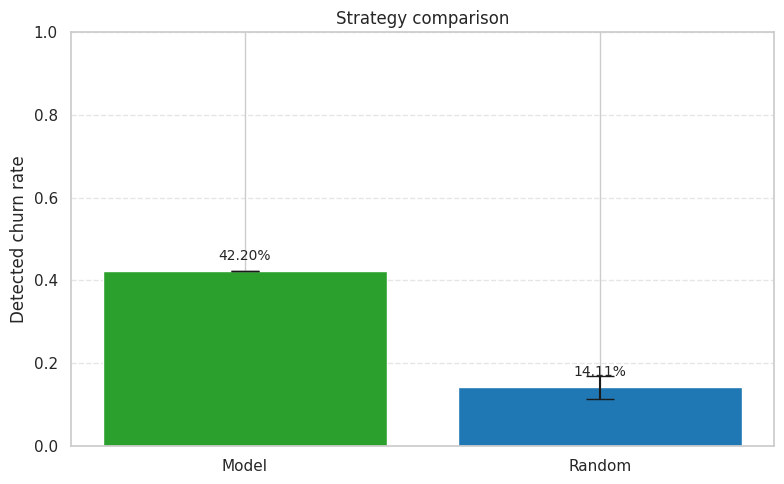

In [60]:
# Random and model values with std
model_rate = churn_rate_top500
mean_random = np.mean(random_rates)
std_random = np.std(random_rates)

# Interval of confidence
ci = 1.96 * std_random

# Comparative barplot
plt.figure(figsize=(8, 5))
bars = plt.bar(["Model", "Random"], [model_rate, mean_random],
               yerr=[0, ci], capsize=10, color=["#2ca02c", "#1f77b4"])


plt.ylabel("Detected churn rate")
plt.title("Strategy comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle="--", alpha=0.5)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02,
             f"{height:.2%}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The results clearly demonstrate the effectiveness of the predictive model compared to a random outreach strategy. While contacting customers at random yields an average churn rate of about 14.1%, with a 95% confidence interval of ±2.9%, the model-based strategy targets customers with a much higher actual churn rate of 42.2%. This significant difference highlights the model's ability to accurately identify high-risk customers, allowing the business to focus retention efforts more efficiently and improve resource allocation. The barplot visualization further emphasizes this disparity, reinforcing the value of using predictive analytics to guide customer engagement strategies.

# Who is likely to churn?

Based on our exploratory data analysis, we have identified several key characteristics that distinguish customers who are more likely to churn from those who stay. These findings are crucial for understanding where to focus retention efforts:

1. **High number of customer service calls**  
   Customers who contact customer service three times or more show a significantly higher churn rate. This suggests unresolved issues or dissatisfaction, making them critical targets for retention outreach.

2. **International plan subscribers**  
   Customers with an international plan churn at a much higher rate. This segment might have higher expectations or face issues with international service quality. Special care should be taken to retain them.

3. **Higher total charges, particularly in the daytime**  
   Churning customers tend to generate more revenue overall, especially during daytime hours. This indicates that the business is losing high-value customers, not just low-usage accounts.

4. **Geographic differences (by state and area code)**  
   Some states show significantly higher churn rates, possibly due to regional service issues or stronger local competition. Area code differences are also notable, though less impactful.

### Customer Profile at Risk of Churn

In summary, the typical customer at high risk of churning is likely to:
- Have an **international plan**
- Make **multiple customer service calls**
- Generate **higher total and international charges**, especially in the **daytime**
- Come from **specific regions or area codes** with elevated churn levels

This customer is not only more likely to leave, they are also **more valuable**, meaning that targeted retention could have a **strong financial impact**.


# Customer’s likelihood of leaving

Using the predictive model developed, the estimated likelihood of each customer leaving (churning) has been calculated and integrated into the original database. This allows the business to identify high-risk customers individually, enabling more focused retention efforts. By incorporating these churn probabilities directly into the dataset, decision-makers can prioritize outreach and tailor strategies to reduce churn more effectively.

In [54]:
df

,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,Churn,state_AL,state_AR,...,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,total_charge,total_minutes,total_calls,churn_probability
0,0,1,45.07,16.78,11.01,2.70,1,0,False,False,...,False,False,False,False,True,False,75.56,717.2,303,0.000801
1,0,1,27.47,16.62,11.45,3.70,1,0,False,False,...,False,False,False,False,True,False,59.24,625.2,332,0.000801
2,0,0,41.38,10.30,7.32,3.29,0,0,False,False,...,False,False,False,False,True,False,62.29,539.4,333,0.003002
3,1,0,50.90,5.26,8.86,1.78,2,0,False,False,...,False,False,False,False,False,False,66.80,564.8,255,0.051821
4,1,0,28.34,12.61,8.41,2.73,3,0,False,False,...,False,False,False,False,True,False,52.09,512.0,359,0.063954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,40.07,18.96,13.39,2.67,2,0,False,False,...,False,False,False,False,False,False,75.09,766.1,374,0.000841
4996,0,0,31.31,21.83,9.61,3.97,3,1,False,False,...,False,False,True,False,True,False,66.72,669.3,278,0.000321
4997,0,0,23.90,14.69,9.56,3.67,1,0,False,False,...,False,False,False,False,True,False,51.82,539.4,318,0.001240
4998,0,0,32.10,14.59,10.10,2.30,0,0,False,False,...,False,False,False,False,False,True,59.09,593.4,254,0.001006


# Top 500 customers to contact first

To effectively manage churn and improve customer retention, the dataset was sorted based on the predicted churn probabilities. The top 500 customers with the highest likelihood of leaving were selected as the priority group for proactive engagement. By focusing on these high-risk customers first, the company can allocate resources more efficiently, aiming to maximize profitability while minimizing the overall churn rate.

In [55]:
top_500_churn_risk

,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,Churn,state_AL,state_AR,...,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,total_charge,total_minutes,total_calls,churn_probability
542,1,1,40.38,21.54,11.93,3.83,9,1,False,False,...,False,False,False,False,True,False,77.68,770.3,297,0.999919
4406,1,0,39.47,20.80,6.81,2.86,7,1,False,False,...,False,False,False,False,False,False,69.94,638.8,259,0.999900
2380,0,0,38.86,11.29,10.22,2.73,9,1,False,False,...,False,False,False,False,False,False,63.10,598.7,366,0.999876
902,0,0,28.32,18.60,9.37,2.21,7,0,False,False,...,False,False,False,False,False,True,58.50,601.9,305,0.999715
2979,0,0,23.07,17.71,9.40,2.38,7,1,False,False,...,False,False,False,False,False,False,52.56,561.9,308,0.999715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,0,0,37.94,10.84,13.02,3.92,3,0,False,False,...,False,False,False,False,False,True,65.72,654.5,282,0.003856
251,0,0,35.34,14.62,8.63,3.89,4,0,False,False,...,False,False,False,False,True,False,62.48,586.1,350,0.003856
2861,0,1,35.75,20.55,9.71,3.54,4,0,False,False,...,False,False,False,False,True,False,69.55,680.9,282,0.003852
2437,0,1,18.63,21.19,14.45,2.24,4,1,False,False,...,False,False,False,False,True,False,56.51,688.4,332,0.003852


The previous table presents the top 500 customers ranked by their predicted churn probability. Among these selected customers, the actual churn rate is 42.2%, highlighting the model’s effectiveness in identifying those most likely to leave.

# Comparison with randomly contacting the business’ customers

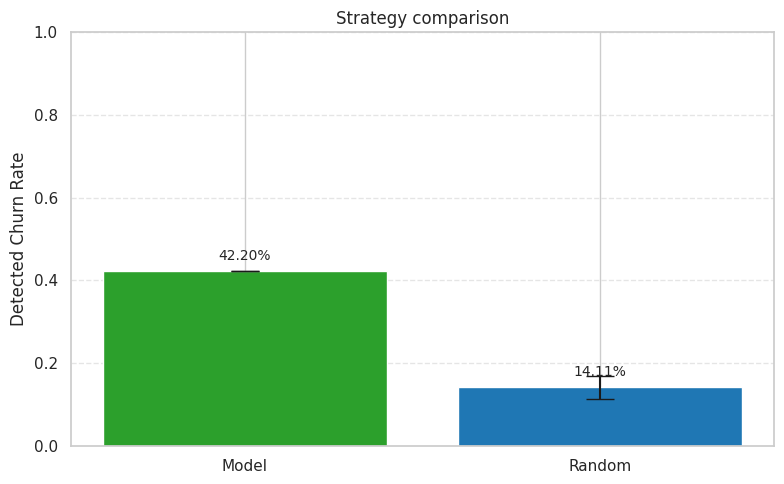

In [59]:
# Random and model values with std
model_rate = churn_rate_top500
mean_random = np.mean(random_rates)
std_random = np.std(random_rates)

# Interval of confidence
ci = 1.96 * std_random

# Comparative barplot
plt.figure(figsize=(8, 5))
bars = plt.bar(["Model", "Random"], [model_rate, mean_random],
               yerr=[0, ci], capsize=10, color=["#2ca02c", "#1f77b4"])


plt.ylabel("Detected Churn Rate")
plt.title("Strategy comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle="--", alpha=0.5)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02,
             f"{height:.2%}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The effectiveness of the model-based targeting strategy against a random selection approach is analysed. The results clearly demonstrate that targeting the top 500 customers predicted to churn achieves an actual churn rate of 42.2%, which is more than three times higher than the average churn rate of 14.1% observed when customers are contacted at random (with a 95% confidence interval of ±2.9%). This significant improvement underscores the strong predictive power of the model and highlights its potential to maximize retention efforts by focusing resources on those customers most at risk of leaving, thereby enhancing profitability and operational efficiency.